### Описание кода:
- В этом коде мы используем датасет `imdb_reviews` из библиотеки Keras для обучения модели нейронной сети для анализа тональности текстовых отзывов. 
- Каждый отзыв представляет собой последовательность индексов слов. 
- Мы загружаем данные, преобразуем их в последовательности фиксированной длины, строим модель нейронной сети, компилируем ее, обучаем и делаем предсказания на тестовом наборе данных.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных imdb_reviews из библиотеки Keras
data = keras.datasets.imdb

In [3]:
# Разделение данных на тренировочный и тестовый наборы
(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=10000)

In [4]:
# Загрузка словаря слов
word_index = data.get_word_index()

In [5]:
# Индексы сдвига слов в словаре
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index['<PAD>'] = 0  # Добавление пустого символа для выравнивания длины отзывов
word_index['<START>'] = 1  # Метка начала отзыва
word_index['<UNK>'] = 2  # Метка для неизвестных слов
word_index['<UNUSED>'] = 3  # Зарезервированная метка

In [6]:
# Инвертирование словаря слов для получения оригинальных текстовых отзывов
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
# Преобразование последовательностей входных данных в текстовые отзывы
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [8]:
# Предобработка данных: приведение длины отзывов к одному размеру
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index['<PAD>'], padding='post', maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index['<PAD>'], padding='post', maxlen=250)

In [9]:
# Создание модели нейронной сети
model = keras.Sequential([
    keras.layers.Embedding(10000, 16),  # Слой эмбеддинга для преобразования слов в вектора
    keras.layers.GlobalAveragePooling1D(),  # Слой пулинга для усреднения векторов
    keras.layers.Dense(16, activation='relu'),  # Полносвязный слой с функцией активации ReLU
    keras.layers.Dense(1, activation='sigmoid')  # Выходной слой с функцией активации сигмоиды
])

In [10]:
# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Обучение модели
history = model.fit(train_data, train_labels, epochs=10, batch_size=512, validation_data=(test_data, test_labels))

Epoch 1/10
49/49 [==============================] - 1s 16ms/step - loss: 0.6896 - accuracy: 0.6141 - val_loss: 0.6836 - val_accuracy: 0.6043
Epoch 2/10
49/49 [==============================] - 1s 14ms/step - loss: 0.6698 - accuracy: 0.7277 - val_loss: 0.6534 - val_accuracy: 0.7454
Epoch 3/10
49/49 [==============================] - 1s 14ms/step - loss: 0.6227 - accuracy: 0.7841 - val_loss: 0.5963 - val_accuracy: 0.7795
Epoch 4/10
49/49 [==============================] - 1s 14ms/step - loss: 0.5506 - accuracy: 0.8182 - val_loss: 0.5232 - val_accuracy: 0.8210
Epoch 5/10
49/49 [==============================] - 1s 14ms/step - loss: 0.4715 - accuracy: 0.8461 - val_loss: 0.4561 - val_accuracy: 0.8335
Epoch 6/10
49/49 [==============================] - 1s 14ms/step - loss: 0.4046 - accuracy: 0.8658 - val_loss: 0.4050 - val_accuracy: 0.8478
Epoch 7/10
49/49 [==============================] - 1s 15ms/step - loss: 0.3540 - accuracy: 0.8787 - val_loss: 0.3692 - val_accuracy: 0.8584
Epoch 8/10
49

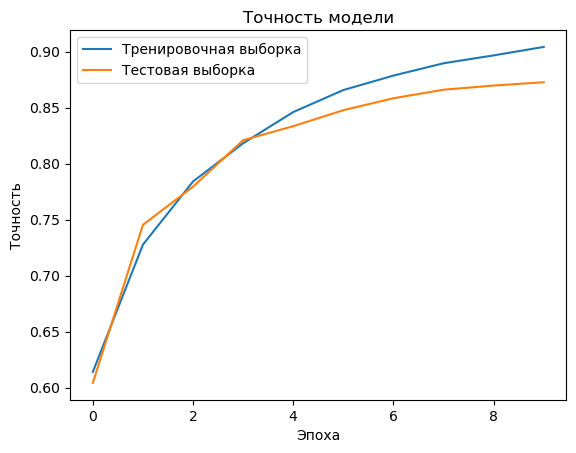

In [12]:
# График точности модели на тренировочном и тестовом наборах данных
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(['Тренировочная выборка', 'Тестовая выборка'], loc='upper left')
plt.show()

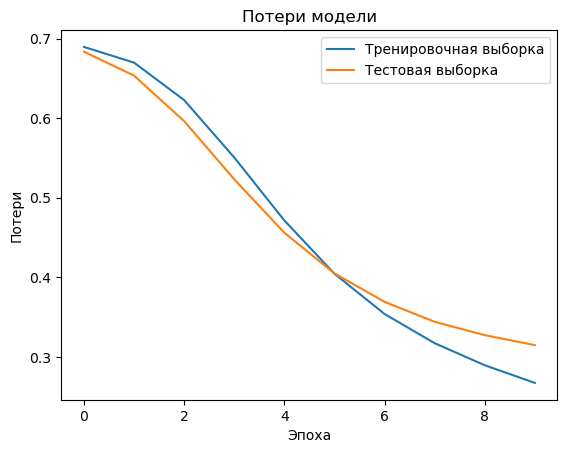

In [13]:
# График потерь модели на тренировочном и тестовом наборах данных
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend(['Тренировочная выборка', 'Тестовая выборка'], loc='upper right')
plt.show()

In [14]:
# Выполнение предсказаний на тестовом наборе данных
predictions = model.predict(test_data)

782/782 [==============================] - 1s 768us/step


In [15]:
# Вывод предсказаний и соответствующих правильных ответов
for i in range(10):
    print("Отзыв:", decode_review(test_data[i]))
    print("Предсказание:", predictions[i])
    print("Правильный ответ:", test_labels[i])
    print()

Отзыв: <START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <P